# Final Project DL model Notebook - sinple CNN model with two convolutional layers - v02 - load from existing weights

using this notebook to validate performance of the model

#### imports, settings and constants

run log: 

- local
- sample data set
- using trained network

In [14]:
import sys

from keras.models import load_model
import numpy as np

from pathlib import Path

sys.path.append(str(Path.cwd().parent))
from utils import *

current_dir = Path.cwd()
HOME_DIR = current_dir.parent
DATA_DIR = HOME_DIR.joinpath('data')
MODEL_PATH = HOME_DIR.joinpath('savedModels/30122017/CNN_two_convs_30122017_1700.h5')

# comment out one of the two path options to toggle between sample directory and all data
# path = DATA_DIR
path = DATA_DIR.joinpath('sample')
val_path = path.joinpath('valid')
test_path = path.joinpath('test')

# general variables
batch_size = 64

# make sure that plotted images show up in the notebook
%matplotlib inline

#### defining CNN model

In [15]:
model = load_model(MODEL_PATH)
model.summary()

/Users/phillipgieshen/anaconda/lib/python3.6/site-packages/keras/models.py:287: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 3, 224, 224)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 222, 222)      896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 222, 222)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 74, 74)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 72, 72)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 72, 72)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 24, 24)        0         
__________

#### test performance and plot confusion matrix on one sample batch of 200 images

In [16]:
val_batches = get_in_batches(val_path, shuffle=False, class_mode=None, batch_size=200)
pred_classes = model.predict_generator(val_batches, 1)
pred_classes = np.argmax(pred_classes, axis=1)
act_classes = val_batches.classes

Found 200 images belonging to 10 classes.


[[20  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0  1 19]]


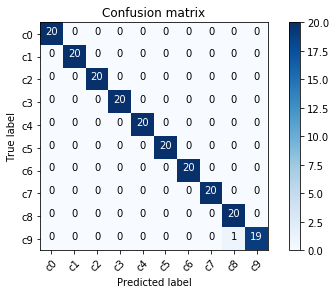

In [17]:
cm = confusion_matrix(act_classes, pred_classes)
plot_confusion_matrix(cm, val_batches.class_indices)
plt.figure()
plt.show()

#### validating the model performance on the val set

Running the evaluate generator returns the cost and accuracy of the model. Doing it in a loop allows us to confirm that the performance is stable. Results should be very similar for all runs. Fixed issue that was causing slow performance by changing second parameter of evaluate_generator to 1. 

In [18]:
rnd_batches = get_in_batches(val_path, batch_size=batch_size, shuffle=True)
val_res = [model.evaluate_generator(rnd_batches, 1) for i in range(10)]
np.round(val_res, 3)

Found 200 images belonging to 10 classes.


array([[ 0.004,  1.   ],
       [ 0.008,  1.   ],
       [ 0.011,  1.   ],
       [ 0.001,  1.   ],
       [ 0.039,  0.984],
       [ 0.026,  1.   ],
       [ 0.005,  1.   ],
       [ 0.001,  1.   ],
       [ 0.007,  1.   ],
       [ 0.   ,  1.   ]])

#### now we manually load a handful of images from the test set and output the prediction on them

In [19]:
test_batches = get_in_batches(test_path, batch_size=4, class_mode=None)

Found 1000 images belonging to 1 classes.


array([[ 0.792     ,  0.        ,  0.        ,  0.001     ,  0.        ,
         0.087     ,  0.001     ,  0.        ,  0.002     ,  0.117     ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.99699998,  0.003     ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.94800001,  0.        ,  0.        ,  0.        ,  0.        ,
         0.002     ,  0.        ,  0.        ,  0.        ,  0.05      ]], dtype=float32)

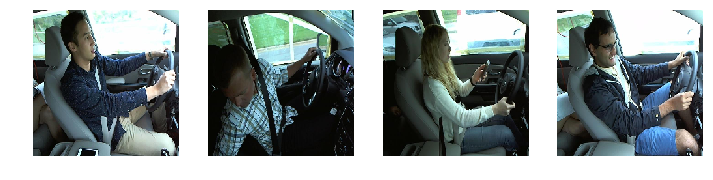

In [20]:
imgs = test_batches.next()
plots(imgs)
prediction = model.predict(imgs)
np.round(prediction, 3)